In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [109]:
house_df = pd.read_csv("data.csv")

In [52]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [111]:
# drop the street , city , statezip column as it is useless for the model
house_df = house_df.drop('street', axis=1)
house_df = house_df.drop('city', axis=1)
house_df = house_df.drop('statezip', axis=1)
house_df = house_df.drop('date', axis=1)
house_df = house_df.drop('country', axis=1)

In [54]:
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [55]:
house_df.shape

(4600, 13)

In [56]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


In [57]:
house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [58]:
house_df['price'].value_counts()

,count
price,
0.000000,49
300000.000000,42
400000.000000,31
600000.000000,29
450000.000000,29
...,...
691000.000000,1
282766.666667,1
406062.500000,1


In [59]:
house_df['bedrooms'].value_counts()

,count
bedrooms,
3.0,2032
4.0,1531
2.0,566
5.0,353
6.0,61
1.0,38
7.0,14
8.0,2
0.0,2


In [60]:
house_df['bathrooms'].value_counts()

,count
bathrooms,
2.50,1189
1.00,743
1.75,629
2.00,427
2.25,419
1.50,291
2.75,276
3.00,167
3.50,162


In [61]:
house_df['waterfront'].value_counts()

,count
waterfront,
0,4567
1,33


In [112]:
house_df= house_df.drop('waterfront', axis=1)

In [63]:
house_df['condition'].value_counts()

,count
condition,
3,2875
4,1252
5,435
2,32
1,6


In [64]:
house_df['sqft_basement'].value_counts()

,count
sqft_basement,
0,2745
500,53
600,45
800,43
900,41
...,...
1730,1
1870,1
1520,1


In [65]:
house_df['view'].value_counts()

,count
view,
0,4140
2,205
3,116
4,70
1,69


In [114]:
house_df = house_df.drop('view', axis=1)

In [67]:
median_price = house_df['price'].median()
house_df['price'] = house_df['price'].replace(0, median_price)


In [68]:
house_df[house_df["price"] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated


In [69]:
house_df['bedrooms'].value_counts()

,count
bedrooms,
3.0,2032
4.0,1531
2.0,566
5.0,353
6.0,61
1.0,38
7.0,14
8.0,2
0.0,2


In [70]:
median_price = house_df['bedrooms'].median()
house_df['bedrooms'] = house_df['bedrooms'].replace(0, median_price)

In [71]:
house_df[house_df["bedrooms"] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated


In [72]:
house_df[house_df["bathrooms"] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2365,1095000.0,3.0,0.0,3064,4764,3.5,3,3064,0,1990,2009
3209,1295648.0,3.0,0.0,4810,28008,2.0,3,4810,0,1990,2009


In [73]:
median_price = house_df['bathrooms'].median()
house_df['bathrooms'] = house_df['bathrooms'].replace(0, median_price)


In [74]:
house_df[house_df["bathrooms"] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated


uni varient graph

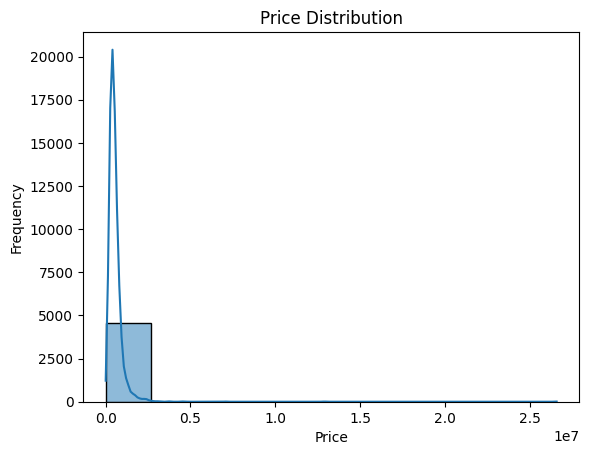

In [75]:
sns.histplot(house_df['price'],bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

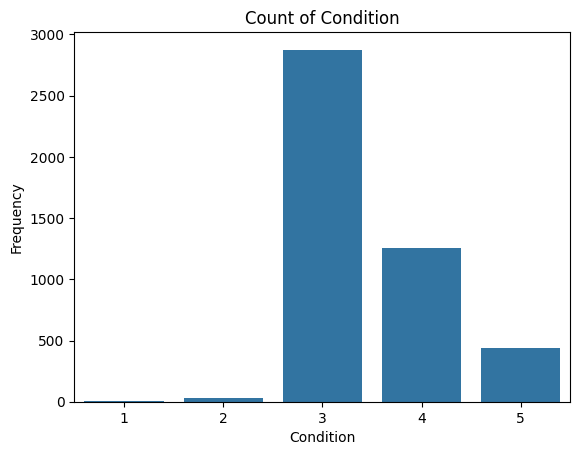

In [76]:
sns.countplot(x='condition', data=house_df)
plt.title('Count of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

<ipython-input-77-851eb4fafbfc>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(house_df['sqft_living'], shade=True)


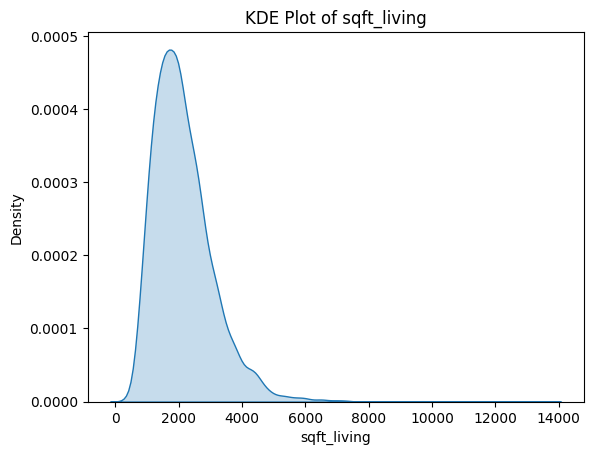

In [77]:
sns.kdeplot(house_df['sqft_living'], shade=True)
plt.title('KDE Plot of sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Density')
plt.show()


<ipython-input-78-ab077d816b8d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(house_df['sqft_basement'], shade=True)


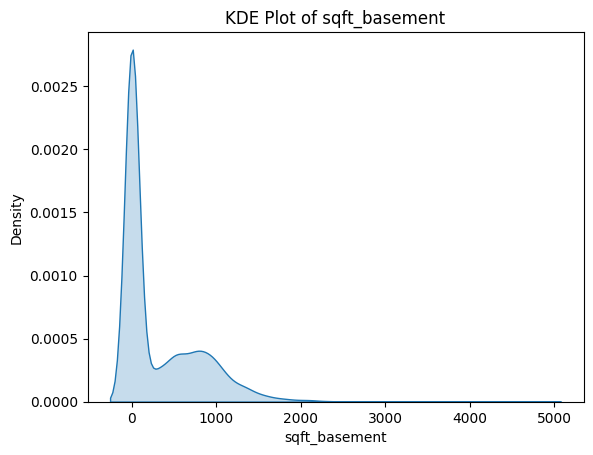

In [78]:
sns.kdeplot(house_df['sqft_basement'], shade=True)
plt.title('KDE Plot of sqft_basement')
plt.xlabel('sqft_basement')
plt.ylabel('Density')
plt.show()


Bivariate Graphs

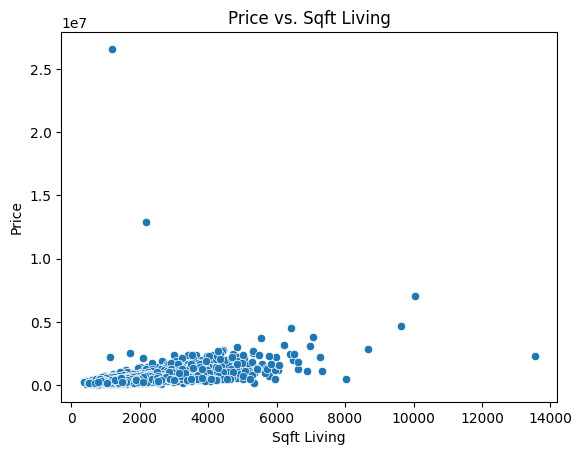

In [79]:
sns.scatterplot(x='sqft_living', y='price', data=house_df)
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

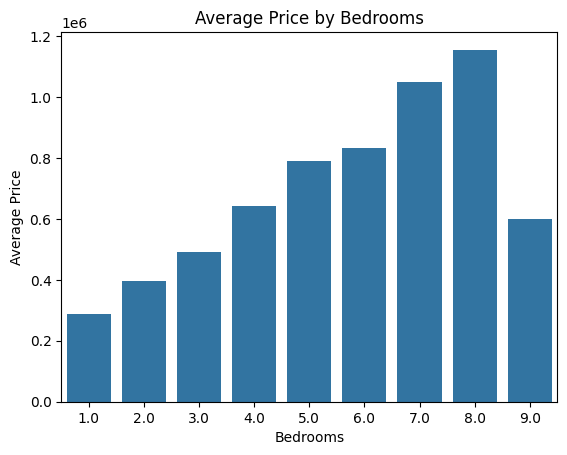

In [80]:
avg_price = house_df.groupby('bedrooms')['price'].mean().reset_index()

sns.barplot(x='bedrooms', y='price', data=avg_price)
plt.title('Average Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.show()


multi varient graph

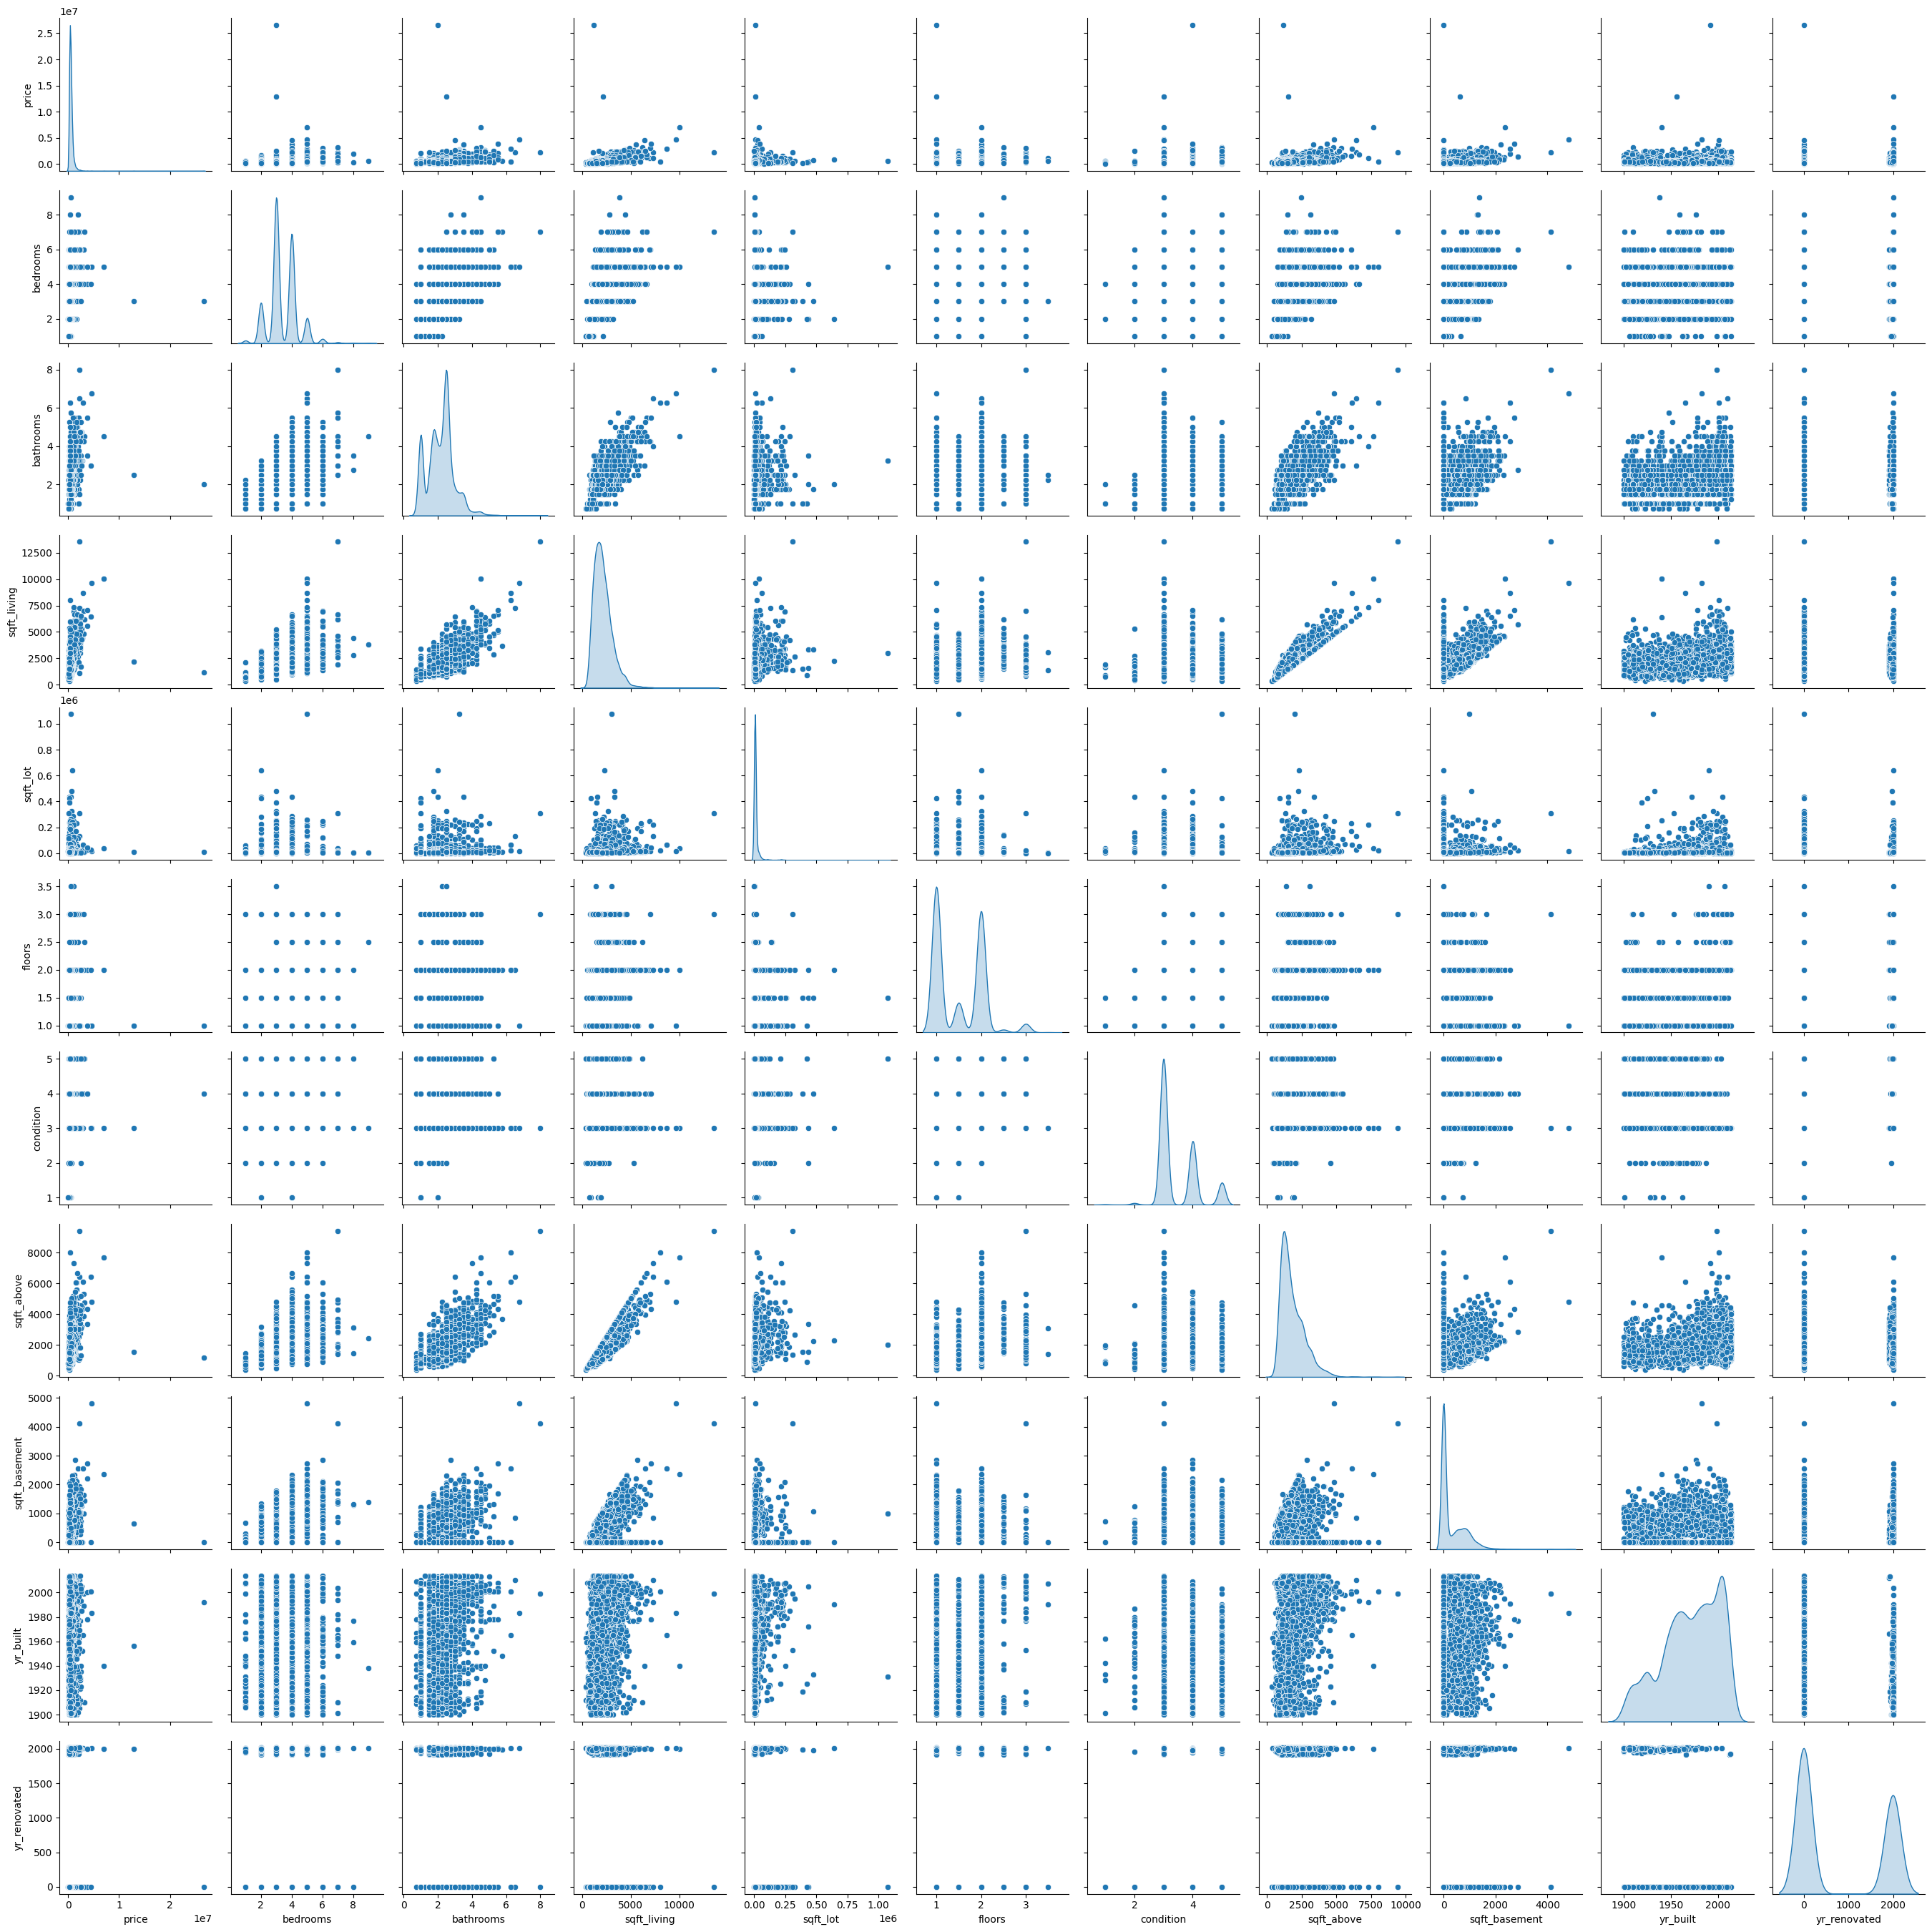

In [81]:
sns.pairplot(house_df , diag_kind='kde')

liner regression

In [94]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
target = 'price'

In [98]:
X = house_df[features]
y = house_df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
df = house_df

In [119]:
true_counts = {}
false_counts = {}

for column in df.select_dtypes(include=['int64', 'float64']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    true_counts[column] = len(df[(df[column] <= lower_bound) | (df[column] >= upper_bound)])
    false_counts[column] = len(df[(df[column] > lower_bound) & (df[column] < upper_bound)])


print("Counts of True (Outliers) for each column:")
for col, count in true_counts.items():
    print(f"{col}: {count}")

print("\nCounts of False (Non-Outliers) for each column:")
for col, count in false_counts.items():
    print(f"{col}: {count}")

Counts of True (Outliers) for each column:
price: 5
bedrooms: 0
bathrooms: 0
sqft_living: 3
sqft_lot: 3
floors: 1
condition: 0
sqft_above: 16
sqft_basement: 6
yr_built: 0
yr_renovated: 0

Counts of False (Non-Outliers) for each column:
price: 3350
bedrooms: 3355
bathrooms: 3355
sqft_living: 3352
sqft_lot: 3352
floors: 3354
condition: 3355
sqft_above: 3339
sqft_basement: 3349
yr_built: 3355
yr_renovated: 3355


In [115]:
for column in house_df.select_dtypes(include=['int64', 'float64']):
    Q1 = house_df[column].quantile(0.25)
    Q3 = house_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]

<ipython-input-115-75d08ef1df4c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]
<ipython-input-115-75d08ef1df4c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]
<ipython-input-115-75d08ef1df4c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]
<ipython-input-115-75d08ef1df4c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]
<ipython-input-115-75d08ef1df4c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df = house_df[(df[column] >= lower_bound) & (house_df[column] <= upper_bound)]
<ipyt

In [116]:
house_df[column] >= upper_bound


,yr_renovated
0,False
2,False
3,False
4,False
5,False
...,...
4595,False
4596,False
4597,False
4598,False


In [117]:
(house_df[column] <= lower_bound).value_counts()


,count
yr_renovated,
False,3355
